# Estudo de Regressão Linear

* A ideia central é pegar um conjunto de dados que possuem uma ou mais variáveis independentes (features) ($x_i, i=1,\dots, N$) e uma variável dependente (targets) ($y_i, i=1,\dots,N$). A partir desse dataset, encontrar uma regressão linear que melhor se encaixe no conjunto de dados.

* Como fazer isso? 
    - Primeiro tomamos uma hipótese do tipo: $h(X, w) = \sum_n w_n\cdot x_n$, onde $x_n$ são as variáveis independentes e $w_n$ são parâmetros (bias) para a nossa regressão. Normalmente, considera-se $w_0$ como o intercepto do eixo $y$.
    - Assim, ajusta-se os parâmetros $w_n$ para minimizar o erro entre as previsões do modelo e os valores reais. Para isso, cria-se uma função de custo (**Erro Quadrático Médio**) baseada nestes parâmetros: $$J(w_0, w_1) = \frac{1}{2N} \sum_{i=1}^N (h(x_i, w) - y_i)^2,$$ onde $N$ é o tamanho do nosso dataset e $y_i$ é o target da variável independente $x_i$.
    - Por fim, minimiza-se a função de custo em relação aos parâmetros escolhidos, isto é, a primeira derivada parcial:

## Gerando um Dataset a partir do sklearn

In [112]:
import sklearn

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, n_targets=1, n_informative=1, noise=6, bias=30, random_state=200)
N = 200

* Aqui, **make_regression** é utilizado para criar um conjunto de dados.
    - n_samples: o número de amostras;
    - n_features: o número de variáveis independentes ($x$);
    - n_informative: o número de variáveis independentes que entrarão no modelo linear;
    - n_targets: o número de resultados esperados pela regressão, o valor de $y_i$ associado a $x_i$;
    - bias: parâmetros do modelo;
    - Desvios do erro Gaussiano aplicado ao conjunto de dados;

* Note que, no exemplo usado, **noise** está baixo para compensar **random_state** alto, ou seja, a geração de dados aleatórias está alta e, portanto, precisamos de baixo ruído. Caso contrário, por padrão, poderíamos deixar random_state=42 e aumentar o ruído para compensar.

## Visualizando o dataset com Matplotlib

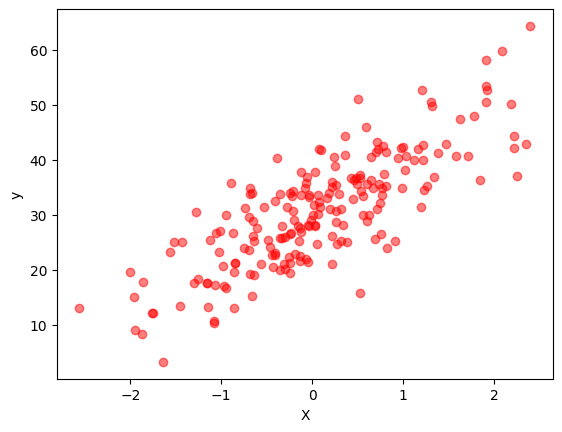

In [113]:
from matplotlib import pyplot as plt

plt.scatter(X, y, c="red", alpha=.5, marker='o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Modelo Linear - Hipótese

In [114]:
import numpy as np

def h(X, w):
    return w[1]*np.array(X[:,0]) + w[0]

## Função de Custo

In [115]:
def cost(X, y, w):
    return (1/(2*N)) * sum(np.square(h(X, w) - np.array(y)))

## Gradient Descent

* Derivada parcial em relação aos parâmetros de otimização

In [116]:
def grad(X, y, w):
    dj_dw0 = (1/N) * sum(h(X, w) - np.array(y))
    dj_dw1 = (1/N) * sum((h(X, w) - np.array(y)) * np.array(X[:,0]))
    return np.array([dj_dw0, dj_dw1])

**learning rate (lr)** $=\alpha$

In [117]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(X, y, w_prev))
    j=0
    
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(X, y, w_prev)[0]
        w1 = w_prev[1] - lr * grad(X, y, w_prev)[1]
        w_new = [w0, w1]

        print(w_new)
        print(cost(X, y, w_new))

        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= 1e-6:
            return w_new
        if j>500:
            return w_new
        j+=1
        

In [118]:
w_prev = [0, -1]

In [119]:
w = descent(w_prev, w_prev, 0.1)
print(w)

[0, -1]
540.5360663843459
[3.095630863344754, 0.11442770988081796]
437.9113933642844
[5.873446610978821, 1.102345428138287]
355.5039050187039
[8.366165526017987, 1.977865778324762]
289.3267499184996
[10.603129563187093, 2.7535473249589413]
236.17997507457181
[12.610653489037027, 3.44056402638543]
193.49509649539317
[14.412337853388406, 4.04885635145409]
159.21039019959102
[16.029349544653595, 4.587266032213947]
131.67082846689087
[17.48067329182008, 5.063656213710699]
109.54778810165583
[18.783337126559395, 5.485018573380516]
91.77462156224568
[19.95261450593569, 5.857568814053482]
77.4949550830467
[21.002205515744063, 6.186831784078627]
66.02119816099956
[21.944399323224104, 6.477717343647051]
56.80124628992387
[22.790219822732876, 6.734587976310906]
49.391757899647274
[23.54955621620599, 6.9613190374459215]
43.436706577550595
[24.231280089449346, 7.161352435618198]
38.650166444244846
[24.843350383306014, 7.337744457271139]
34.80249455533613
[25.392907513577818, 7.493208368754657]
31.

## Visualizando os resultados

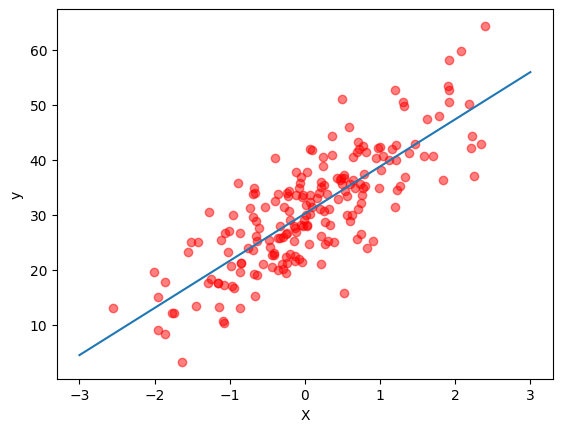

In [122]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    return w[1]*x + w[0]

plt.scatter(X, y, c="red", alpha=.5, marker='o')
graph(my_formula, range(-3, 4))
plt.xlabel("X")
plt.ylabel("y")
plt.show()
